In [ ]:
import requests
#search patent data by param at "https://developer.uspto.gov/ibd-api/#!/bulkdata/searchPublicationData" 
url = 'https://developer.uspto.gov/ibd-api/v1/application/publications?publicationFromDate=2021-09-09&publicationToDate=2021-09-09&start=0&rows=10&largeTextSearchFlag=N' 
#param set by 'from date' and 'to date', you can set other param.
#it seems no need for headers and api key.
res = requests.get(url)
res.text

In [ ]:
#convert json to python obj.
import json
pdict= json.loads(res.text)
print(pdict)

In [47]:
# put content above into dict 
import pandas as pd
import pprint
p_list = pdict['results']
df = pd.DataFrame([i for i in p_list])
#df_e1 = df[df.columns[12]] #這是ClaimText
#df_e2 = df[df.columns[13]] #這是DescriptionText
df_forcsv = df.drop(df.columns[[2, 10, 11, 12, 13]], axis=1)
#需要刪除index, filingDate[2], filelocationURI, archiveURI然後重塑Dataframe
df_dict = pd.Series(df.claimText.values, index=df.patentApplicationNumber).to_dict()
df_dict2 = {k: str(v[0]) for k,v in df_dict.items()}
#需要摘出claimText轉成字典丟給Google USE
df_forcsv.head(3)
df_forcsv.to_csv("patent_table_api.csv", index=False)
#需要匯出成CSV



In [ ]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk_stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def Patent_KW50(patent_text):
  tokens = nltk.word_tokenize(patent_text)
  wnl = ([lemmatizer.lemmatize(token) for token in tokens])
  nouns = [word for (word, pos) in nltk.pos_tag(wnl) if(pos[:2] == 'NN')] #只取出名詞
  fdist = nltk.FreqDist(nouns)
  common50 = fdist.most_common(50)
  common50_new1 = [(k,v) for k,v in common50 if not re.fullmatch(r"^.$", k)]
  common50_new2 = [(k,v) for k,v in common50_new1 if re.fullmatch(r"^[a-z]+$", k, flags=re.IGNORECASE)]
  stopword = list(nltk_stopwords)[:500] + ['cited','claim','us','fig','et','may','al','according']
  common50_new3 = dict([(k,v) for k,v in common50_new2 if not k in stopword])
  return common50_new3

patent_docs_KW = {}
for pat_num, txt in df_dict2.items():
  patent_docs_KW[pat_num] = Patent_KW50(txt)

pprint.pprint(patent_docs_KW, width=1000)

{'diker': 28, 'assembly': 21, 'wheel': 17, 'paddle': 16, 'equipment': 15, 'bracket': 13, 'farm': 12, 'implement': 12, 'system': 12, 'field': 11, 'farming': 11, 'lift': 9, 'arm': 9, 'member': 9, 'support': 8, 'layer': 6, 'plate': 6, 'pin': 6, 'soil': 5, 'movement': 5}


<Figure size 432x288 with 0 Axes>

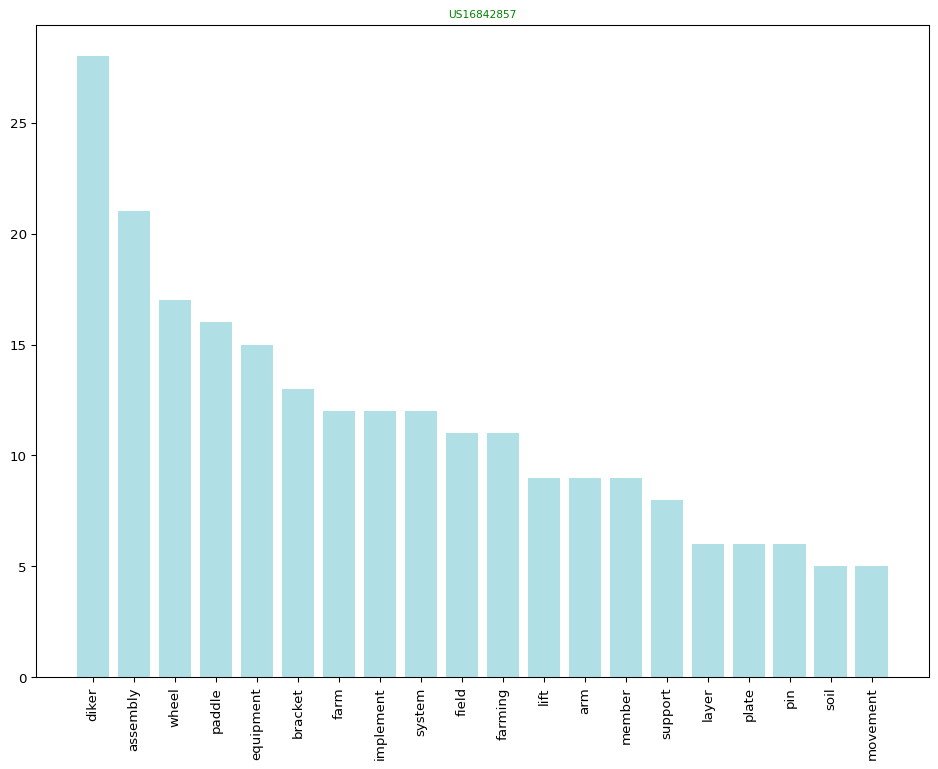

{'tiller': 14, 'apparatus': 13, 'plurality': 13, 'blade': 13, 'assembly': 12, 'rotating': 11, 'penetrating': 4, 'force': 4, 'tip': 3, 'curve': 2, 'direction': 2, 'soil': 2, 'backwards': 2, 'ploughing': 1, 'surface': 1, 'respect': 1, 'clockwise': 1, 'axis': 1, 'right': 1, 'shoe': 1}


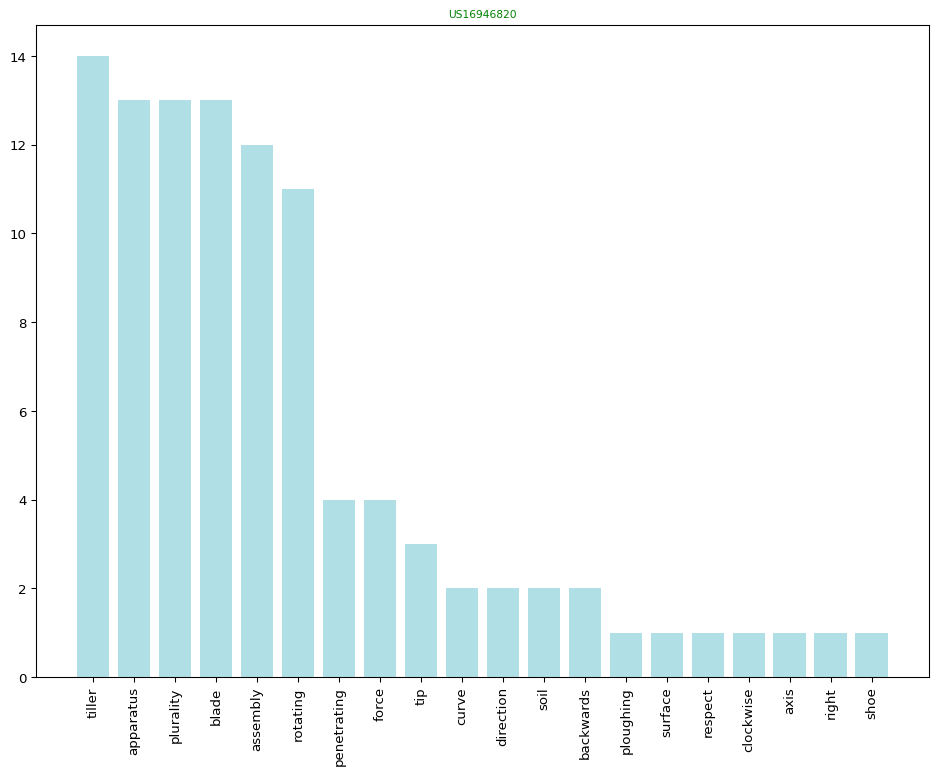

{'stabilizer': 34, 'portion': 24, 'vehicle': 17, 'implement': 14, 'position': 8, 'switch': 8, 'controller': 8, 'ground': 7, 'stabilization': 7, 'system': 7, 'frame': 6, 'storage': 5, 'hitch': 3, 'plurality': 3, 'tool': 3, 'relative': 3, 'support': 3, 'surface': 3, 'weight': 3, 'movement': 3}


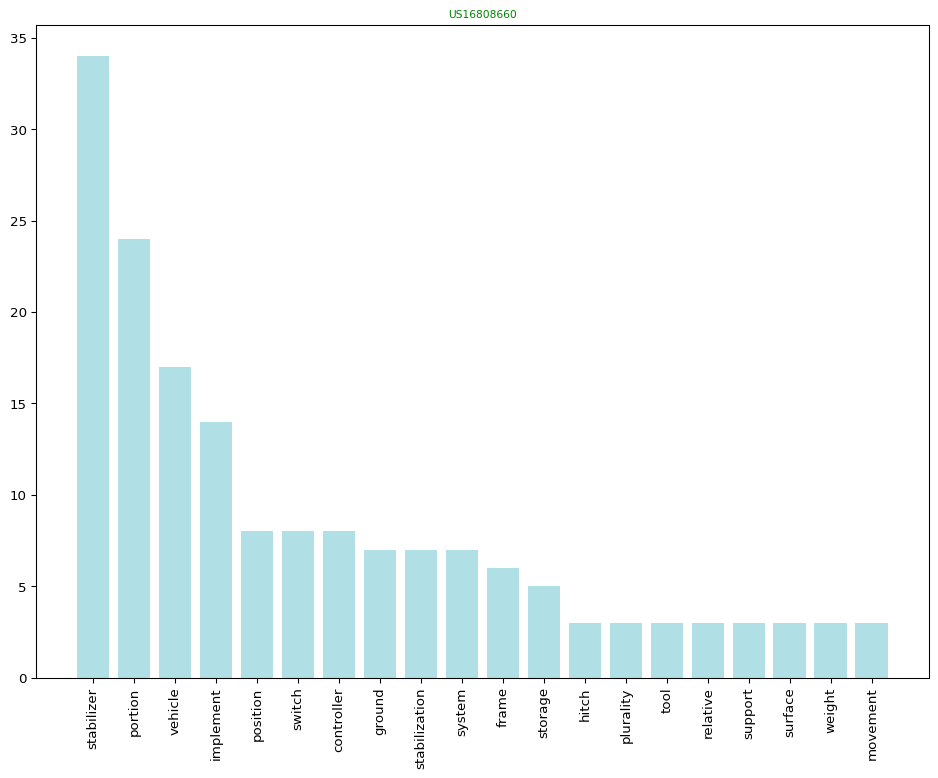

{'row': 46, 'wheel': 34, 'unit': 31, 'bracket': 25, 'wherein': 21, 'toolbar': 15, 'pair': 15, 'base': 14, 'configuration': 12, 'respect': 11, 'planter': 11, 'implement': 9, 'method': 9, 'seed': 9, 'shifting': 8, 'step': 8, 'assembly': 7, 'twin': 7, 'leadscrew': 6, 'bed': 5}


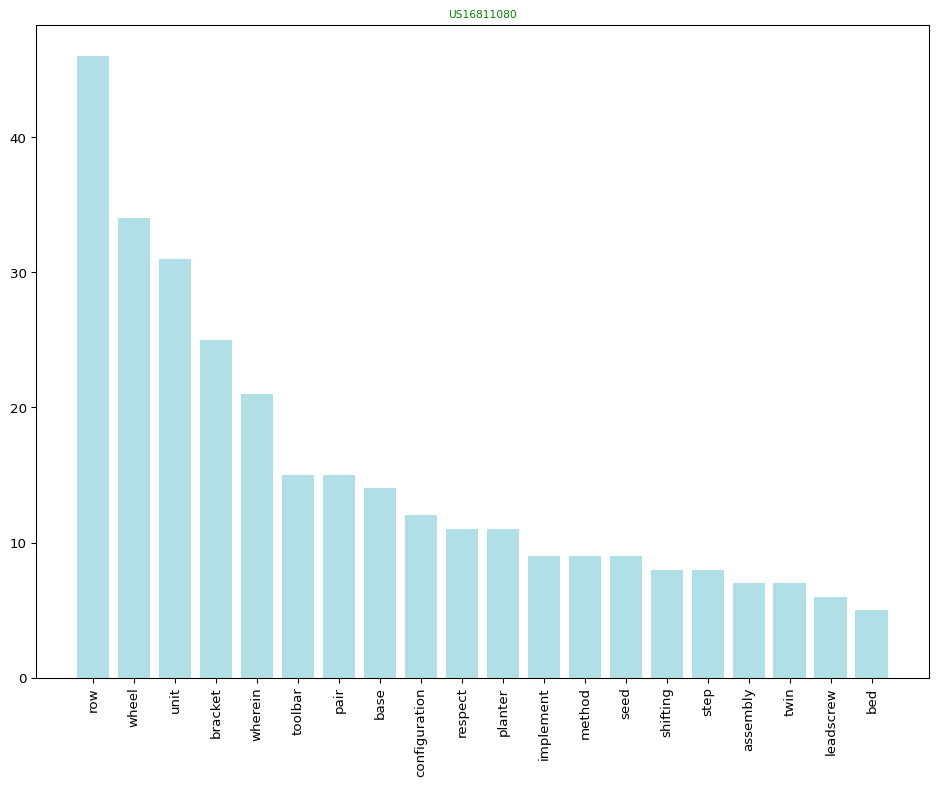

{'zone': 40, 'surface': 38, 'roughness': 36, 'data': 34, 'field': 30, 'index': 29, 'vehicle': 26, 'comprising': 20, 'setting': 20, 'transition': 20, 'work': 18, 'site': 18, 'range': 16, 'system': 15, 'pitch': 14, 'roll': 14, 'method': 13, 'angle': 12, 'image': 12, 'view': 12}


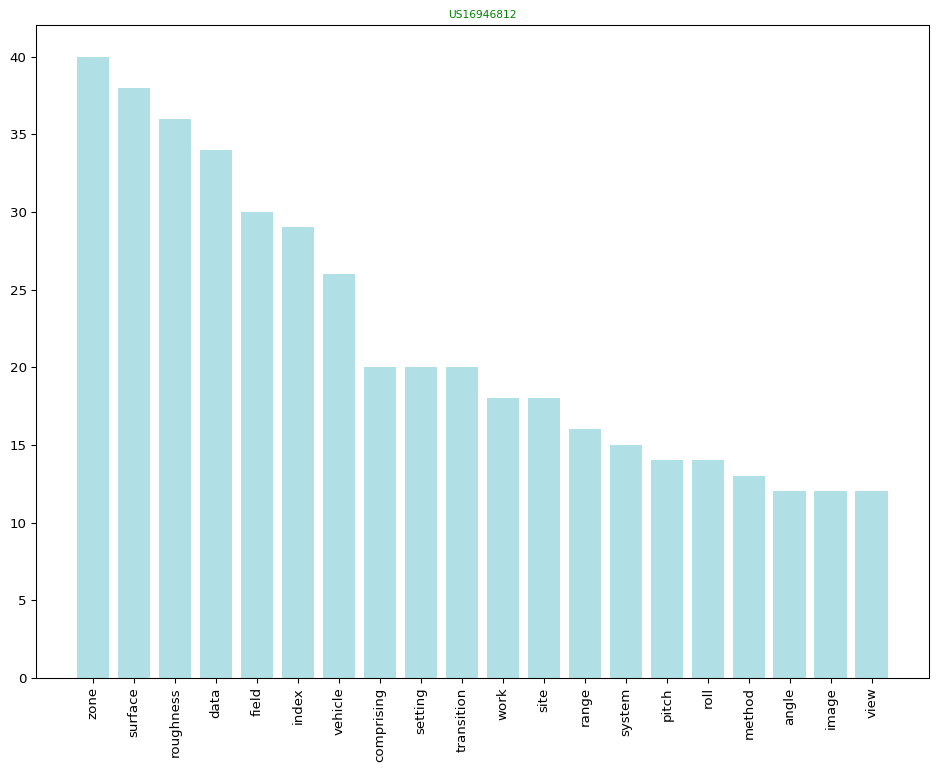

{'seed': 31, 'pod': 21, 'storage': 15, 'device': 15, 'cavity': 13, 'substrate': 9, 'method': 9, 'axis': 7, 'planting': 6, 'end': 4, 'comprising': 4, 'facilitate': 3, 'tape': 3, 'direction': 2, 'side': 2, 'environment': 2, 'spoilage': 2, 'kit': 2, 'plurality': 1, 'following': 1}


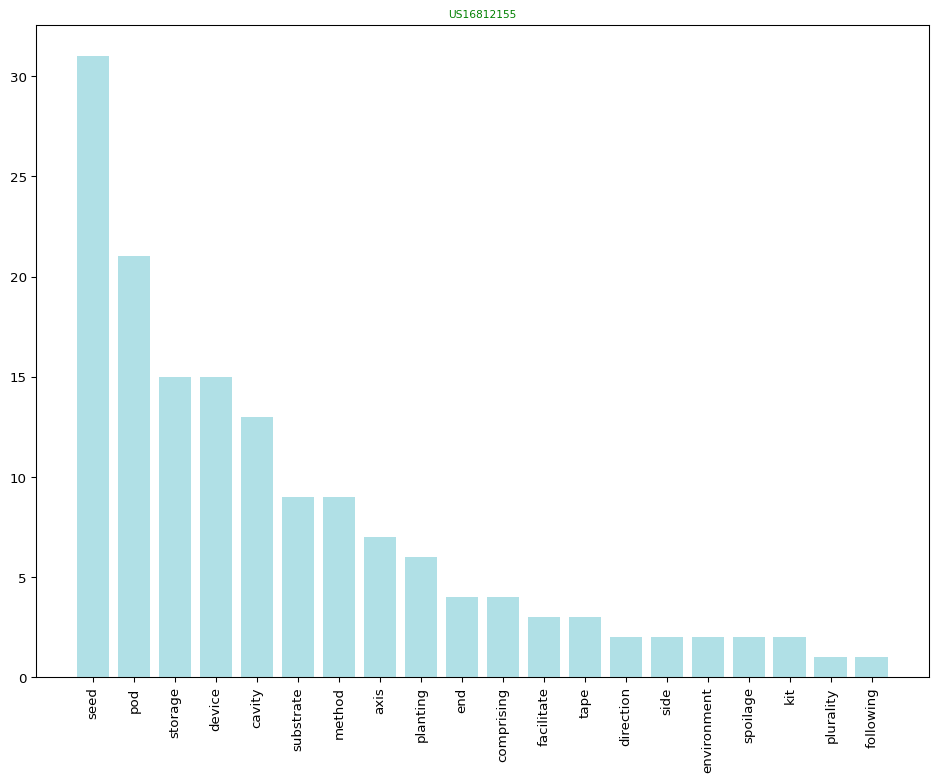

{'spray': 24, 'nozzle': 12, 'method': 11, 'test': 10, 'section': 10, 'source': 9, 'step': 8, 'bag': 7, 'pattern': 7, 'light': 6, 'stimulus': 5, 'droplet': 3, 'direction': 3, 'air': 3, 'portion': 3, 'protrusion': 2, 'region': 2, 'rheology': 2, 'modifier': 2, 'gum': 2}


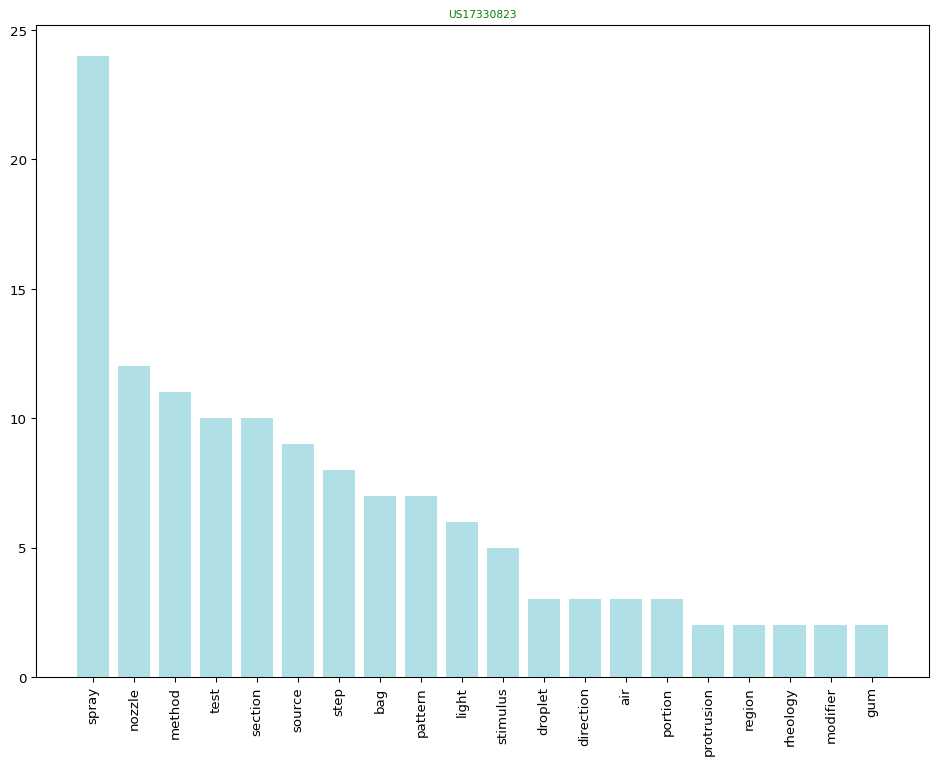

{'soil': 38, 'feedstock': 32, 'method': 31, 'microbe': 16, 'subunit': 15, 'parameter': 13, 'fertility': 12, 'plant': 11, 'composition': 10, 'specie': 9, 'culturing': 8, 'material': 8, 'panel': 8, 'worm': 7, 'location': 6, 'product': 6, 'group': 6, 'wherein': 6, 'amount': 5, 'mass': 5}


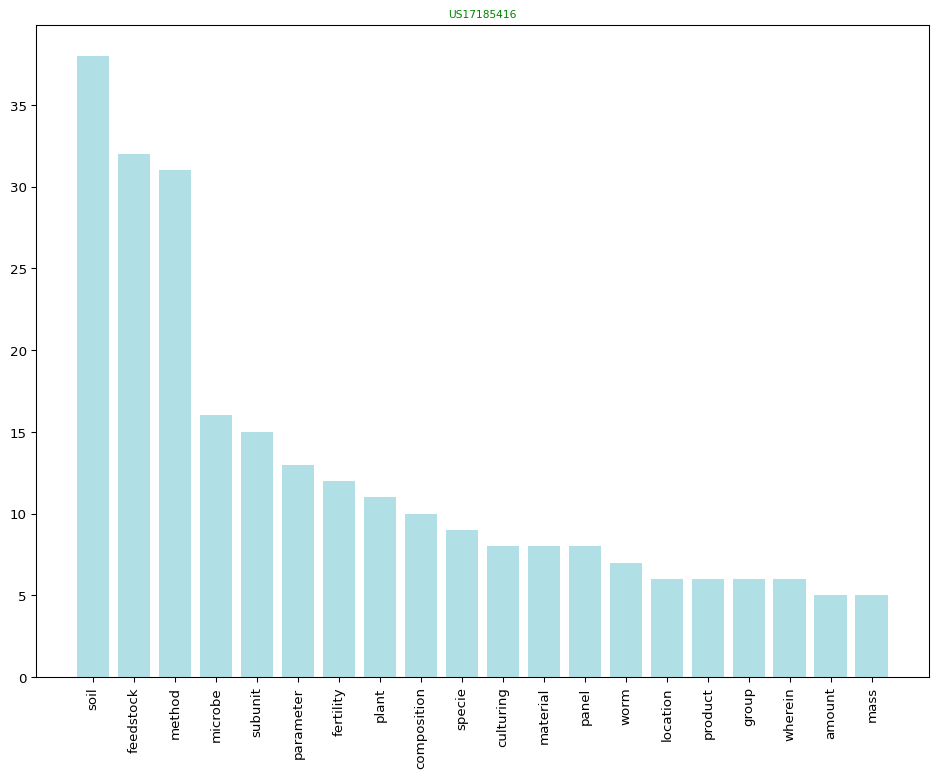

{'state': 37, 'control': 16, 'work': 16, 'information': 15, 'machine': 10, 'adjustment': 9, 'mechanism': 9, 'device': 8, 'unit': 7, 'reference': 7, 'value': 7, 'member': 6, 'time': 5, 'difference': 4, 'comprising': 3, 'target': 3, 'change': 3, 'amount': 3, 'cutter': 3, 'blade': 2}


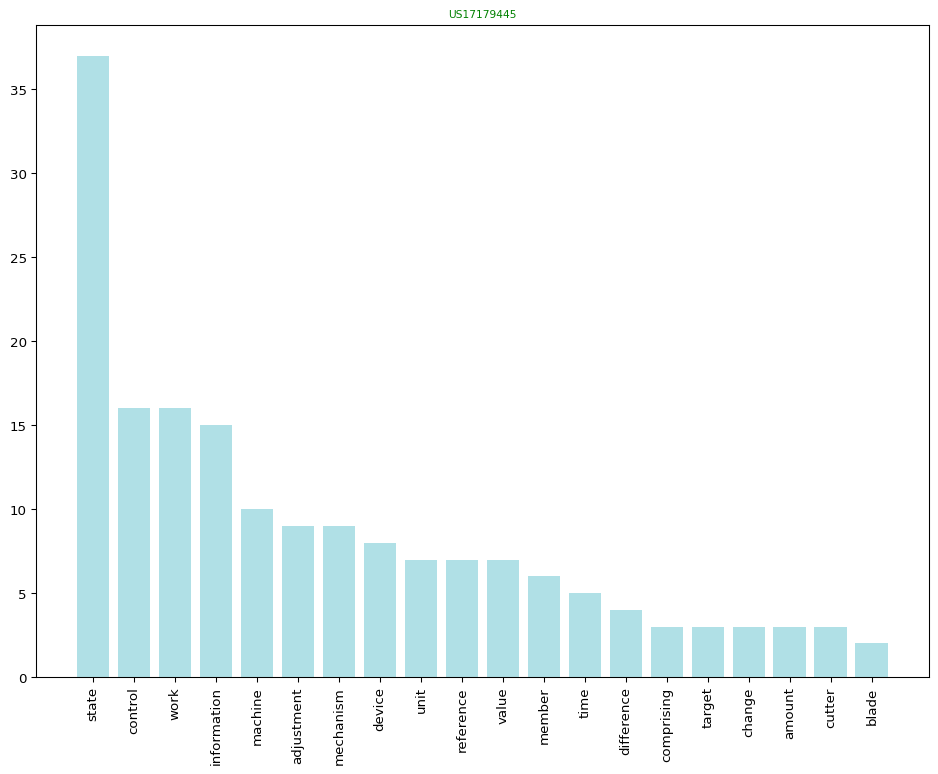

{'segment': 50, 'work': 37, 'tool': 21, 'perimeter': 21, 'position': 21, 'system': 18, 'distance': 18, 'area': 15, 'safety': 11, 'detection': 9, 'unit': 9, 'controller': 8, 'method': 7, 'response': 6, 'object': 6, 'comprises': 4, 'step': 3, 'plurality': 2, 'comprising': 2, 'determination': 2}


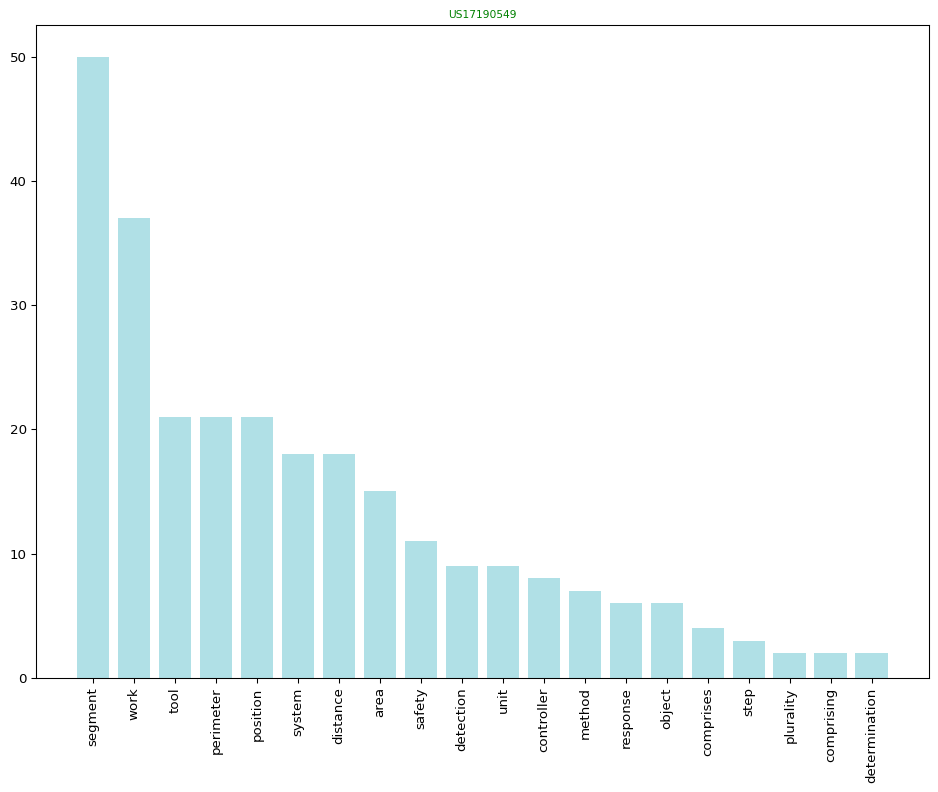

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
%matplotlib inline

plt.clf()
patent_docs_KW20 ={}

for doc_name, KW_stat in patent_docs_KW.items():
  common20 = dict(islice(KW_stat.items(), 20))
  print(common20)
  patent_docs_KW20[doc_name] = ' '.join(common20.keys())
  plt.figure(figsize=(12, 9), dpi=96)
  x = np.arange(20)
  y = common20.values()
  plt.title( doc_name, fontsize=8, color='g')
  plt.xticks(x, common20.keys(),  rotation='vertical')
  plt.bar(x, y, color='powderblue')
  plt.savefig('Graphapi_{}.png'.format(doc_name), format="PNG", dpi=96)
  plt.show()

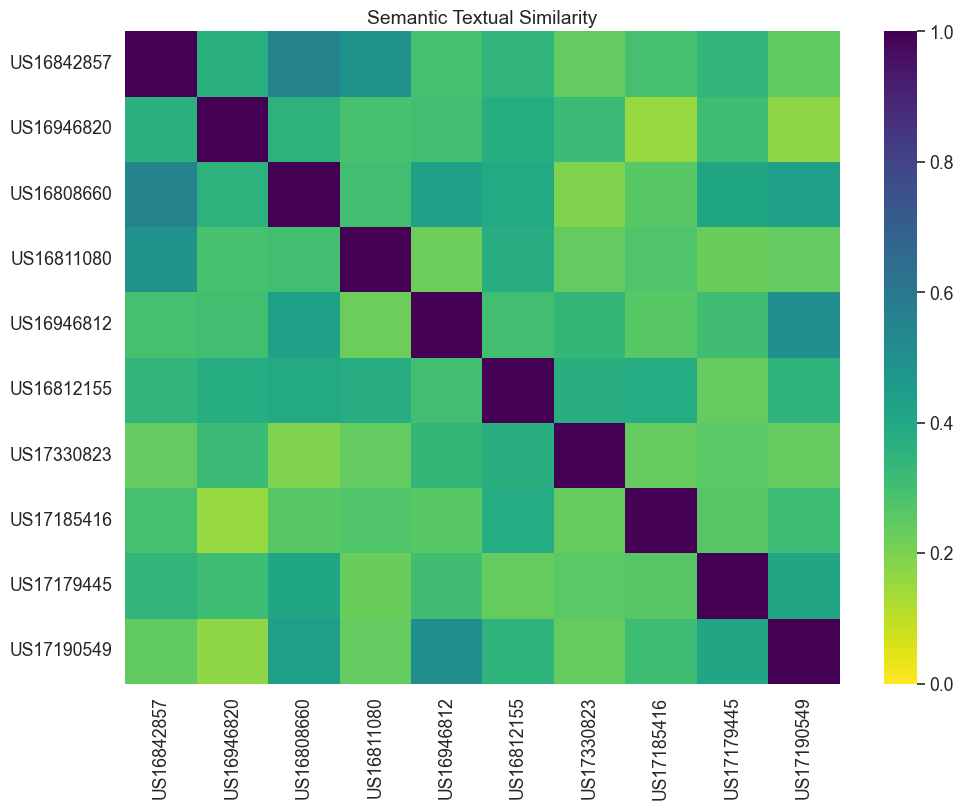

In [51]:
import seaborn as sns
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  plt.figure(figsize=(12, 9), dpi=96)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="viridis_r")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")
  plt.savefig('patentheatmapalt.png')

def run_and_plot(messages):
  message_embeddings_ = embed(list(patent_docs_KW20.values()))
  plot_similarity(list(patent_docs_KW20.keys()), message_embeddings_, 90)

run_and_plot(patent_docs_KW20)